# Using Dense Neural Networks on IRIS classification problem

In this notebook, we are using dense neural networks to classify iris flowers as setosa, virginica or versicolor.
>

**Prerequisites:**
* **Basic knowledge of Deep Learning.**

**Libraries:**
* **Keras:** A library for creating neural networks in few lines.
* **Matplotlib:** Matplotlib is a plotting library. You can use it to draw different types of graphs, like line, scattered, bar, etc.
* **Sklearn:** Scikit-Learn is a machine learning library but we are only going to use it for importing the iris dataset.
>


# Introduction

Even though there are lots of iris species, we are only going to classify 3 of them. We will use 4 features of these flowers to predict which class they belong. These features are sepal length (cm), sepal width (cm), petal length (cm) and petal width (cm). At the end of the notebook, I will show you that we can achive 96% accuracy with our predictions.



Pictures of Virginica, Versicolor and Setosa

![virginica](https://i.ibb.co/gtbgMRC/rsz-iris-virginica.jpg)
![versicolor](https://i.ibb.co/KjND50m/rsz-iris-versicolor.jpg)
![setosa](https://i.ibb.co/zxjbzVD/rsz-iris-baby-blue.jpg)

# Preprocessing

We are loading our data using Sklearn's "load_iris" function and spliting it as test set and training set using the "train_test_split" function.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
data = load_iris()

features = data["data"]
labels = data["target"]

In [ ]:
input_train, input_test, output_train, output_test = train_test_split(
    features, labels, test_size=0.2)

Now we normalize our features. This helps our model to converge mininmum loss faster in the training process.

In [ ]:
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

mean = input_train.mean(axis=0)
input_train -= mean

std = input_train.std(axis=0)
input_train /= std

input_test -= mean
input_test /= std

And finally we are changing our labels to one-hot vectors. This process is essential for classification problems like this. It is also necessary for our last activation function "Softmax" to work.
>

Examples of one-hot encoding:
>

0 (Virginica) becomes [1, 0, 0]
>

1 (Versicolor) becomes [0, 1, 0]
>

2 (Setosa) becomes [0, 0, 1]

In [ ]:
print("Example of a training label before one-hot encoding:", output_train[0])

output_train = keras.utils.to_categorical(output_train, 3)
output_test = keras.utils.to_categorical(output_test, 3)

print("Same label after one-hot encoding:", output_train[0])

Example of a training label before one-hot encoding: 2
Same label after one-hot encoding: [0. 0. 1.]


# Model

Now, let's create our model. We are initiating our sequential object with a list that contains the layers we want to use.

* **Dense (Fully Connected):** They are the simple layers that have connections between every input and output neuron.

We will use ReLUs (Rectified Linear Units) as activation functions for the hidden layers and Softmax function for the last layer. We should use Softmax in multi-class problems.

In [ ]:
model = Sequential([
  Dense(128, activation="relu", input_shape=(len(input_train[0]),)),
  Dense(128, activation="relu"),
  Dense(len(output_train[0]), activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 387       
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


Now we have to decide which optimizer and loss function to use for our model. Since this is a classification problem and since we are using Softmax for the last activation function, Categorical Crossentropy should be our choice.

And for our optimizer, we can pick Adam or Adadelta. They are usually my first picks because it's shown that they work really well with lots of different problems.
>

**Loss Function:** Categorical Crossentropy

For more information about Keras loss functions [click here](https://keras.io/losses/).
>

**Optimizer:** Adam

For more information about Keras optimizers [click here](https://keras.io/optimizers/).

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.002),
              metrics=['accuracy'])

# Training

Let's train our model. Additional to loss, mean absolute error will be calculated and  printed out on every epoch.

In [ ]:
history = model.fit(input_train, output_train,
                    epochs=20,
                    validation_split=0.2)

Train on 96 samples, validate on 24 samples
Epoch 1/20
96/96 [==============================] - 0s 3ms/step - loss: 1.2169 - acc: 0.3333 - val_loss: 0.9920 - val_acc: 0.6667
Epoch 2/20
96/96 [==============================] - 0s 244us/step - loss: 0.9207 - acc: 0.7188 - val_loss: 0.8436 - val_acc: 0.6250
Epoch 3/20
96/96 [==============================] - 0s 214us/step - loss: 0.7408 - acc: 0.8021 - val_loss: 0.6830 - val_acc: 0.8333
Epoch 4/20
96/96 [==============================] - 0s 203us/step - loss: 0.6305 - acc: 0.8229 - val_loss: 0.5753 - val_acc: 1.0000
Epoch 5/20
96/96 [==============================] - 0s 198us/step - loss: 0.5474 - acc: 0.9375 - val_loss: 0.5134 - val_acc: 0.9583
Epoch 6/20
96/96 [==============================] - 0s 190us/step - loss: 0.4742 - acc: 0.9271 - val_loss: 0.4736 - val_acc: 0.9583
Epoch 7/20
96/96 [==============================] - 0s 184us/step - loss: 0.4268 - acc: 0.9479 - val_loss: 0.4329 - val_acc: 1.0000
Epoch 8/20
96/96 [================

We can see how training went using our history object.

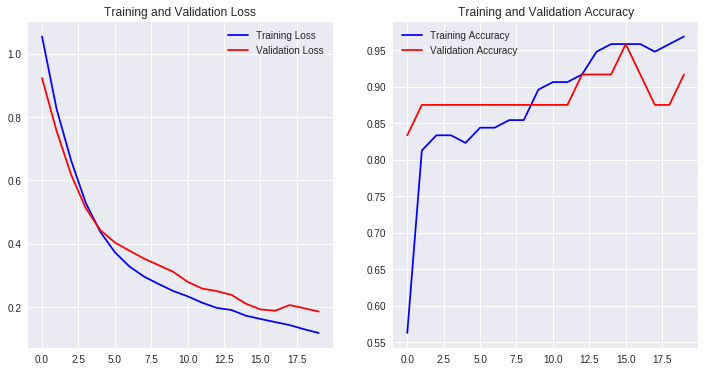

In [ ]:
loss = history.history['loss']
acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
epochs = range(len(loss))

f, axarr = plt.subplots(1, 2, figsize=(12, 6))
p0 = axarr[0]
p1 = axarr[1]

p0.set_title("Training and Validation Loss")
p1.set_title("Training and Validation Accuracy")

p0l0 = p0.plot(epochs, loss, "-b", label="Training Loss")
p0l1 = p0.plot( epochs, val_loss, "-r", label="Validation Loss")

p1l0 = p1.plot(epochs, acc, "-b", label="Training Accuracy")
p1l1 = p1.plot(epochs, val_acc, "-r", label="Validation Accuracy")

legend0 = p0.legend()
legend1 = p1.legend()

# Evaluation

Finally the training process is done. Now we can evaluate our model's performance on the test set.

In [ ]:
score = model.evaluate(input_test, output_test)

print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

30/30 [==============================] - 0s 126us/step
Test Loss: 0.12160614132881165
Test Accuracy: 0.9666666388511658


As you can see, our model's predictions are 96% accurate on the test set.

Let's predict couple of examples.
>

*Side note: You can't predict single examples with "model.predict()". But you can reshape the data to have an extra batch size dimention to fix it.*

In [ ]:
predictions = model.predict(input_test[0:5])

true_labels = output_test[0:5]

for i in range(len(predictions)):
  print("Prediction:", data["target_names"][predictions[i].argmax()], ",",
        "True Label:", data["target_names"][true_labels[i].argmax()])

Prediction: virginica , True Label: virginica
Prediction: setosa , True Label: setosa
Prediction: setosa , True Label: setosa
Prediction: virginica , True Label: virginica
Prediction: versicolor , True Label: versicolor
